In [ ]:
import pandas as pd
df=pd.read_csv(r"C:\Users\admin\Downloads\Diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
cols_with_zero= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [6]:
imputer = SimpleImputer(strategy='median')
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])


In [7]:
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

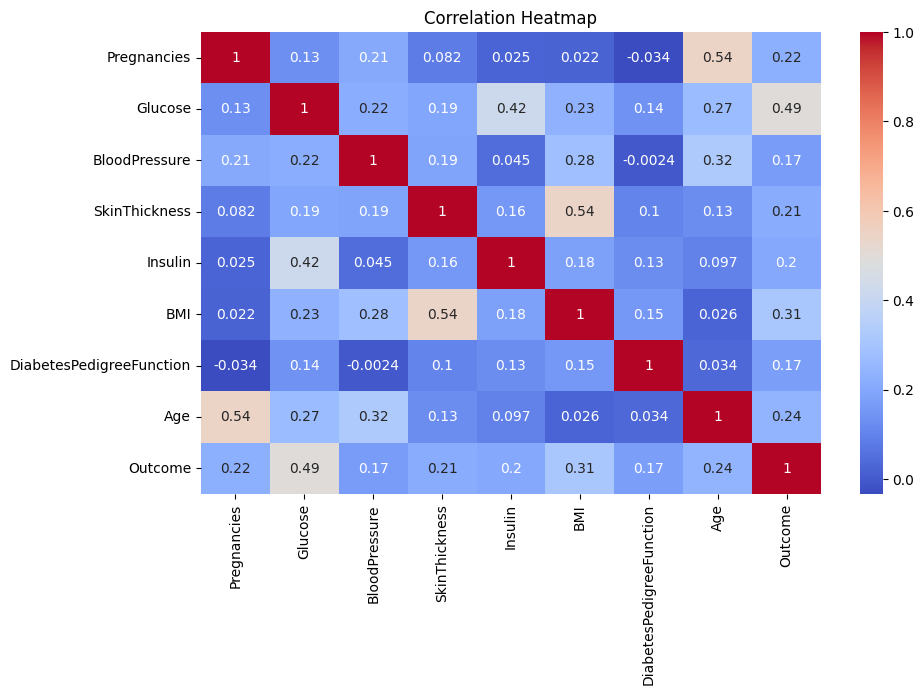

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has_pregnancies,Glucose_BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958,0.855469,3996.667188
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951,0.351857,1469.660470
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000,1100.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000,1.000000,2924.100000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000,1.000000,3750.150000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.000000,4800.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000,10692.000000


In [9]:
df['BMI_category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

df['Age_group'] = pd.cut(df['Age'],
                         bins=[19, 30, 40, 50, 60, 100],
                         labels=['21s', '31s', '41s', '51s', '60+'],
                         include_lowest=True)

df['Has_pregnancies'] = (df['Pregnancies'] > 0).astype(int)

df['Glucose_BMI'] = df['Glucose'] * df['BMI']


In [10]:
df = pd.get_dummies(df, columns=['BMI_category'], drop_first=False)

In [11]:
df = pd.get_dummies(df, columns=[ 'Age_group'], drop_first=False)

In [12]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [14]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
model.score(x_train_scaled,y_train)

0.7915309446254072

In [16]:
y_pred = model.predict(x_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test,y_pred)

0.7467532467532467

In [19]:
print(confusion_matrix(y_test,y_pred))

[[84 16]
 [23 31]]


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



In [21]:
import joblib

joblib.dump(model, 'diabetes_lr_model.joblib')

['diabetes_lr_model.joblib']

In [22]:
import joblib

joblib.dump(scaler, 'scaled.joblib')

['scaled.joblib']

In [23]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Has_pregnancies,Glucose_BMI,BMI_category_Underweight,BMI_category_Normal,BMI_category_Overweight,BMI_category_Obese,Age_group_21s,Age_group_31s,Age_group_41s,Age_group_51s,Age_group_60+
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,4972.8,False,False,False,True,False,False,True,False,False
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1,2261.0,False,False,True,False,False,True,False,False,False
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,4263.9,False,True,False,False,False,True,False,False,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,2500.9,False,False,True,False,True,False,False,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,5904.7,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,1,3322.9,False,False,False,True,False,False,False,False,True
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0,1,4489.6,False,False,False,True,True,False,False,False,False
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,1,3170.2,False,False,True,False,True,False,False,False,False
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1,1,3792.6,False,False,False,True,False,False,True,False,False
